In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penguins/penguins.csv


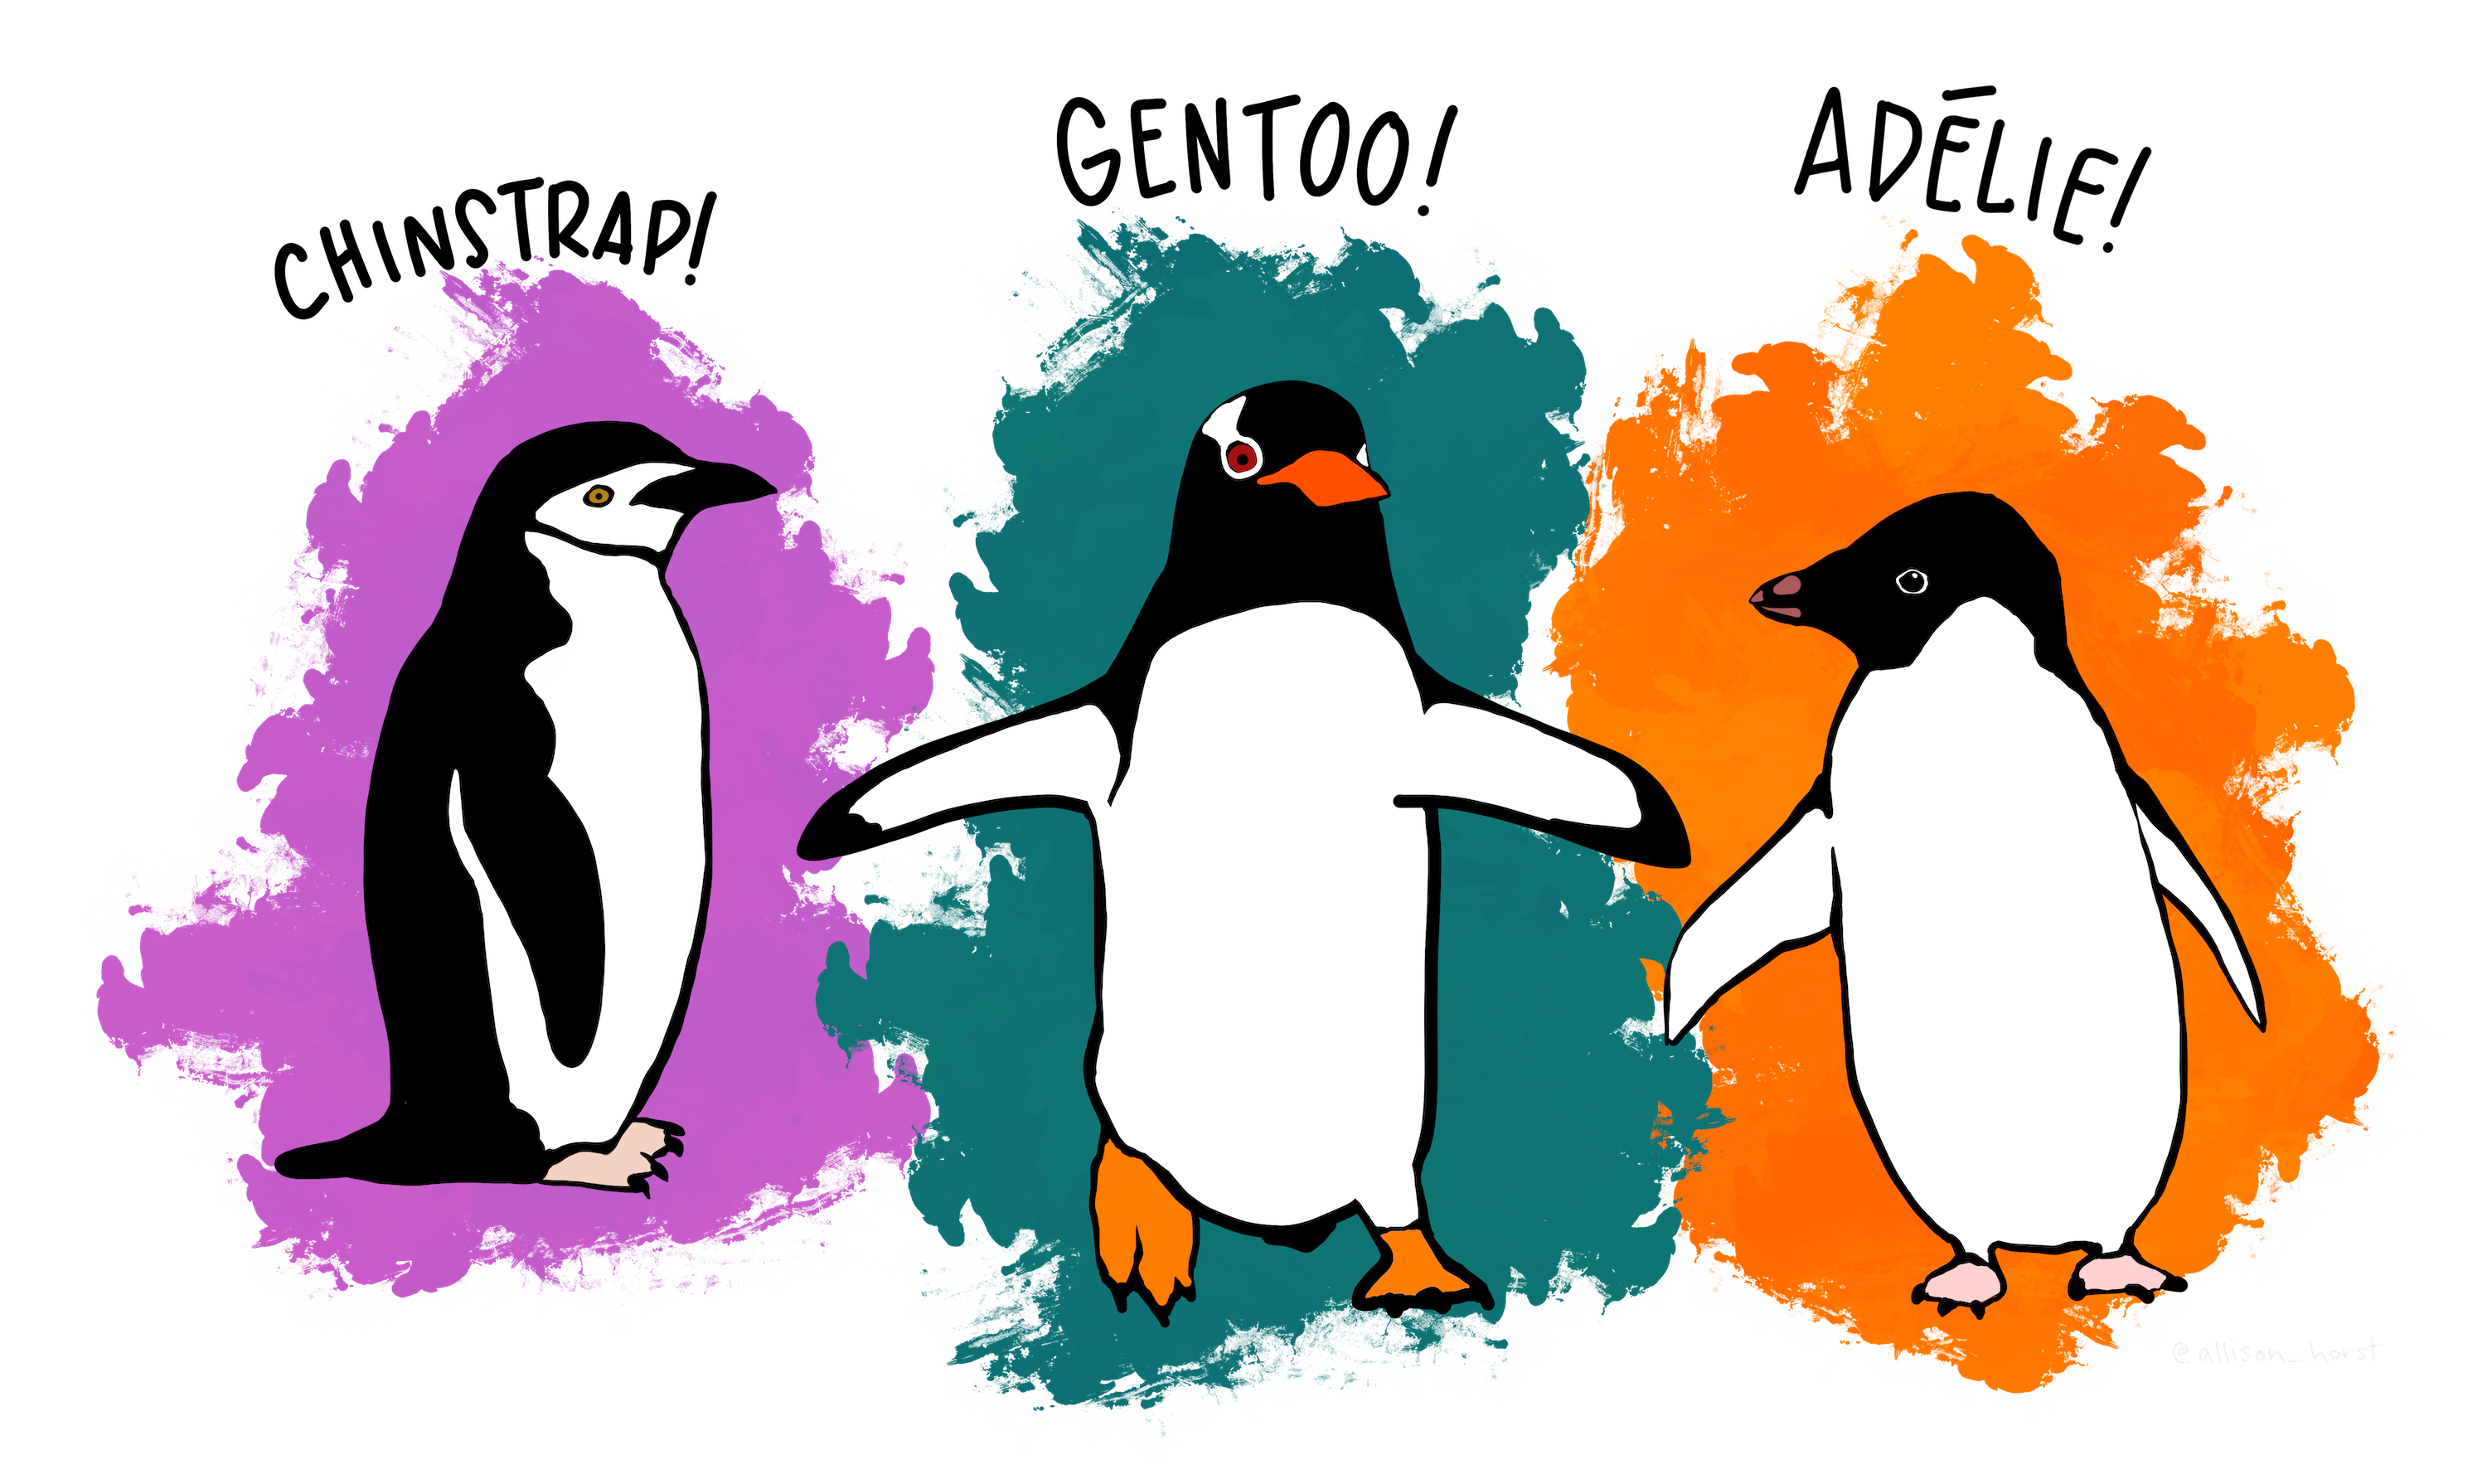
source : “Artwork by @allison_horst”.

# About the dataset:
The dataset contains different body measurements for three species of penguins from three islands in the Palmer Archipelago, Antarctica.<br>
It has 344 instances and 8 columns. <br>

The dataset consists of the following features: <br>
1. species 
2. island 
3. culmen measurements : (i) bill/culmen length (ii) bill/culmen depth
4. flipper length
5. body mass
6. sex
7. year<br>
In this data, every row is a unique observation (an individual penguin). For each penguin, you have the species of the penguin, which island it lives on, its sex, the year the measurements were taken, and some body size measurements.
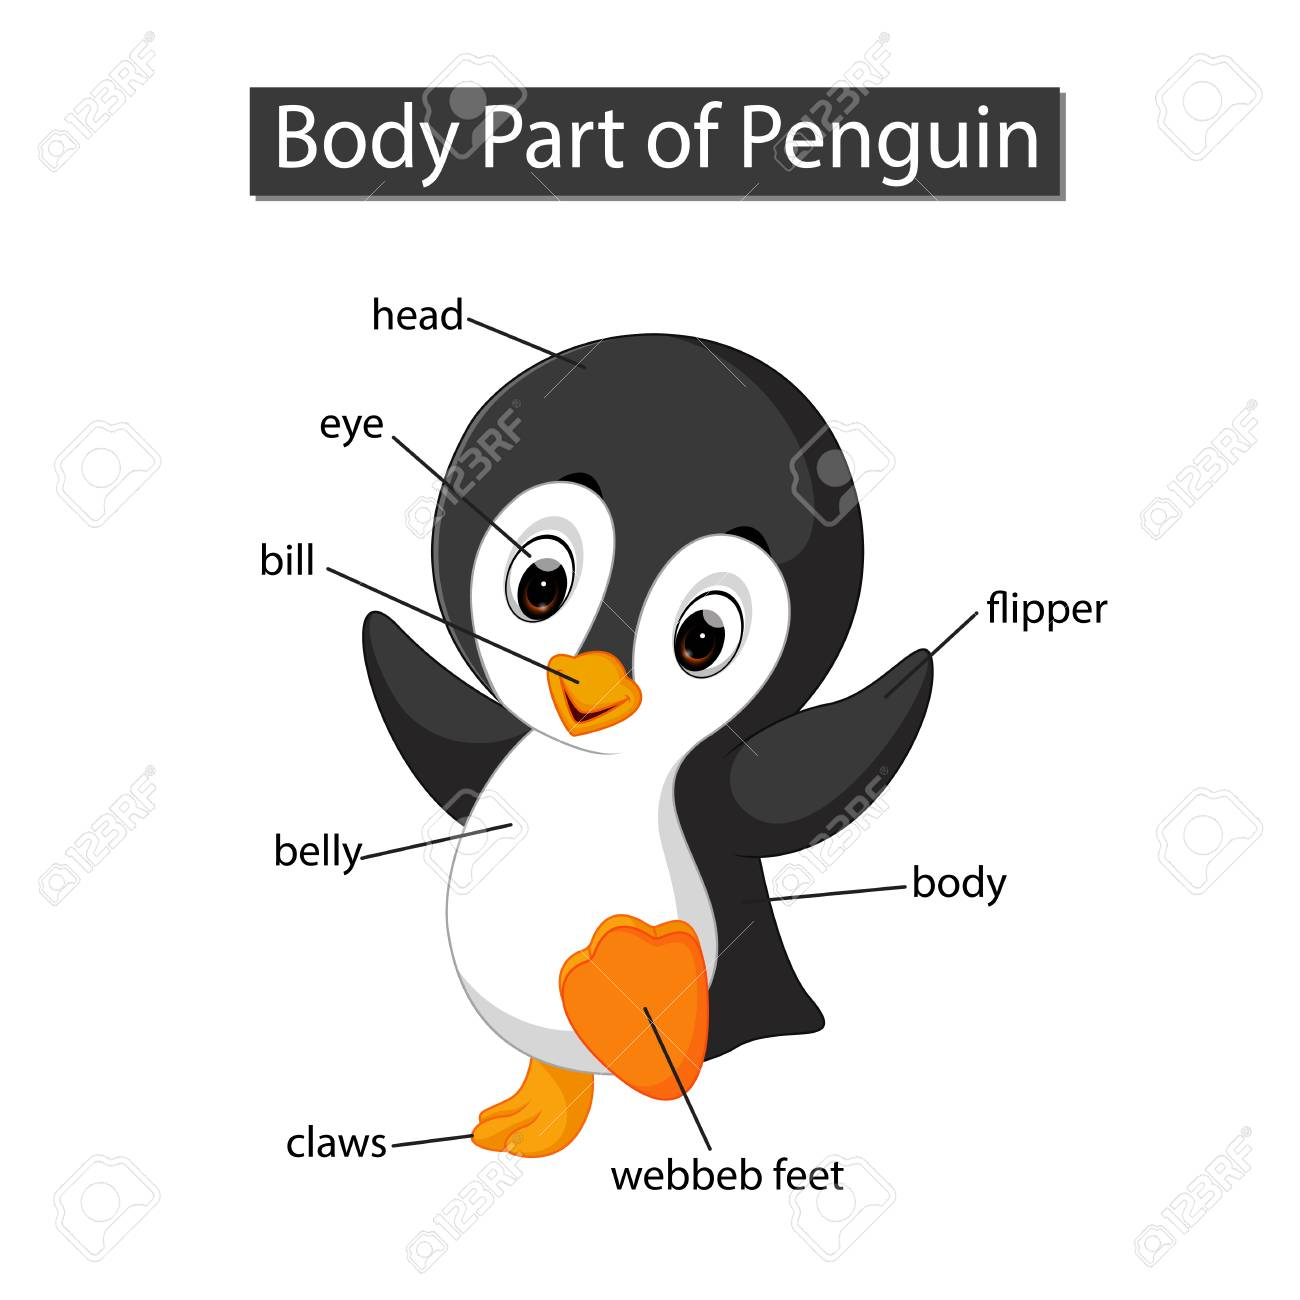
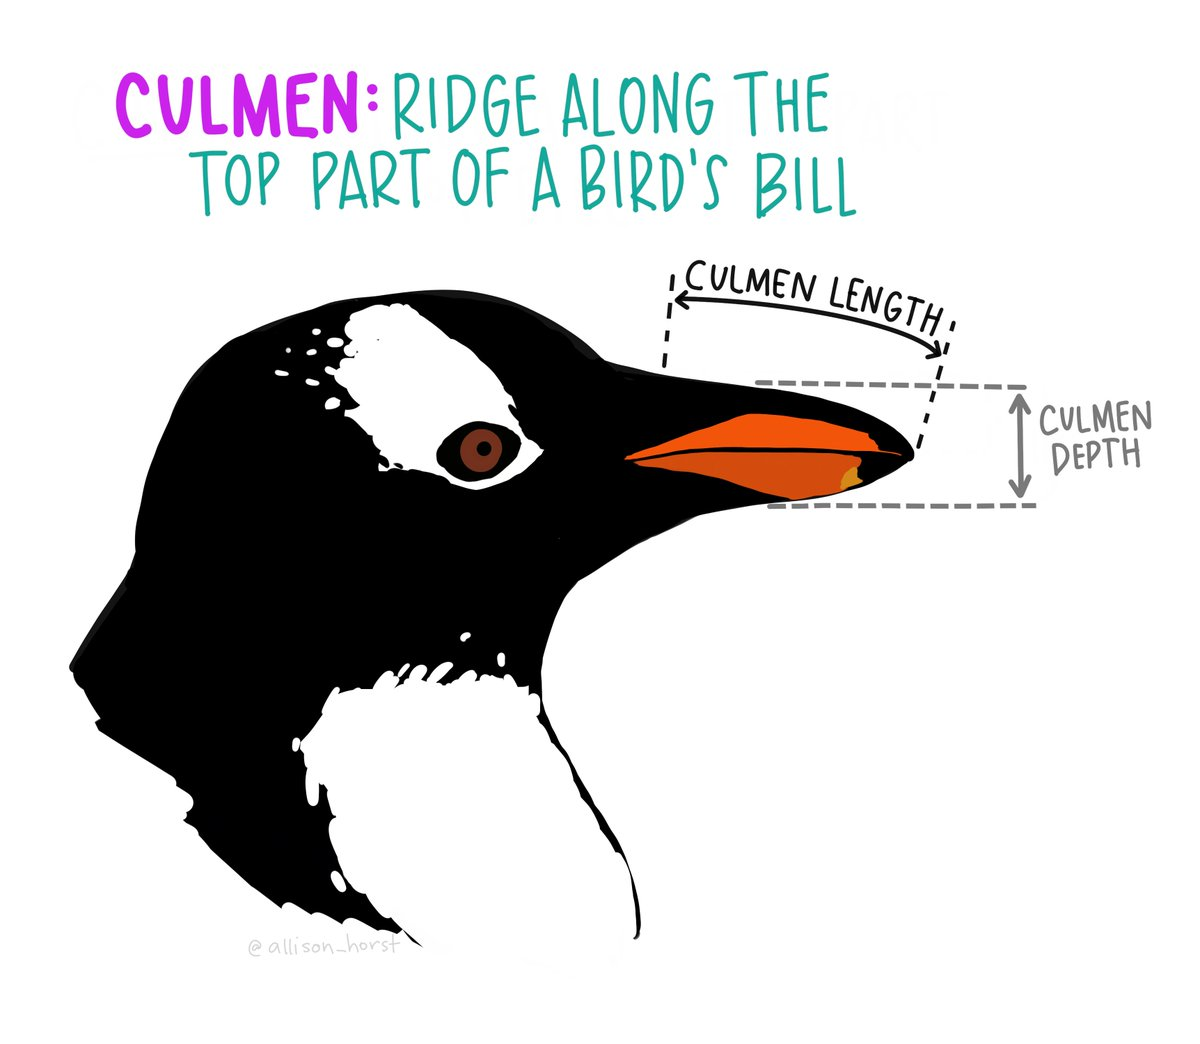

# Load the dataset

In [3]:
# read the csv file into a data frame named penguins
penguins = pd.read_csv('/kaggle/input/penguins/penguins.csv')

In [4]:
# View the data frame
penguins

Unnamed: 0    species     island  bill_length_mm  bill_depth_mm  \
0             1     Adelie  Torgersen            39.1           18.7   
1             2     Adelie  Torgersen            39.5           17.4   
2             3     Adelie  Torgersen            40.3           18.0   
3             4     Adelie  Torgersen             NaN            NaN   
4             5     Adelie  Torgersen            36.7           19.3   
..          ...        ...        ...             ...            ...   
339         340  Chinstrap      Dream            55.8           19.8   
340         341  Chinstrap      Dream            43.5           18.1   
341         342  Chinstrap      Dream            49.6           18.2   
342         343  Chinstrap      Dream            50.8           19.0   
343         344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2                195.0       3250.0  female  2007  
3                  NaN          NaN     NaN  2007  
4                193.0       3450.0  female  2007  
..                 ...          ...     ...   ...  
339              207.0       4000.0    male  2009  
340              202.0       3400.0  female  2009  
341              193.0       3775.0    male  2009  
342              210.0       4100.0    male  2009  
343              198.0       3775.0  female  2009  

[344 rows x 9 columns]

In [5]:
# remove the unnnamed column
penguins = penguins.drop('Unnamed: 0', axis = 1)
# view after dropping the unwanted column
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

# Explore the Dataset

In [6]:
# check the data types 
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

The penguin dataset consists of 3 categorical and 5 numerical features

In [7]:
# Get the description of the numerical colums
penguins.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

The count is different between the columns which indicate there are some missing numerical data.

In [8]:
# Get the description of the categorical colums
penguins.describe(include=[object])

species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       152     168   168

The count is different between the columns which indicate there are some missing categorical data.<br>
There are 3 unique species with Adelie being the most found. <br>
There are 3 different islands where penguins are found, Biscoe island has most of the penguins.<br>
The male penguins are more in number compared to the female penguins.

In [9]:
# Let's check for the missing values.
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

There are 2 missing values in body measurements and 11 missing values for the gender of the penguins.

In [10]:
# Handle the missing values
# penguins.dropna()
from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
penguins.iloc[:,:] = imputer.fit_transform(penguins)

In [11]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

<AxesSubplot:>

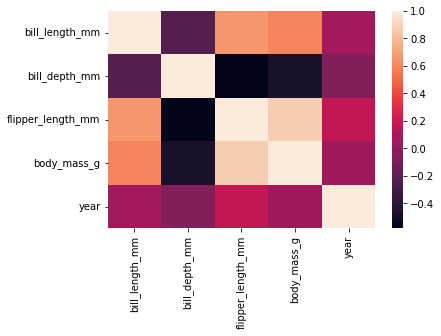

In [12]:
# Check the correlation
import seaborn as sns
sns.heatmap(penguins.corr())

<AxesSubplot:xlabel='species', ylabel='Count'>

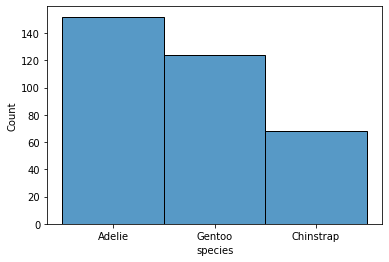

In [13]:
# Check the count of each species
sns.histplot( data = penguins['species'])

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


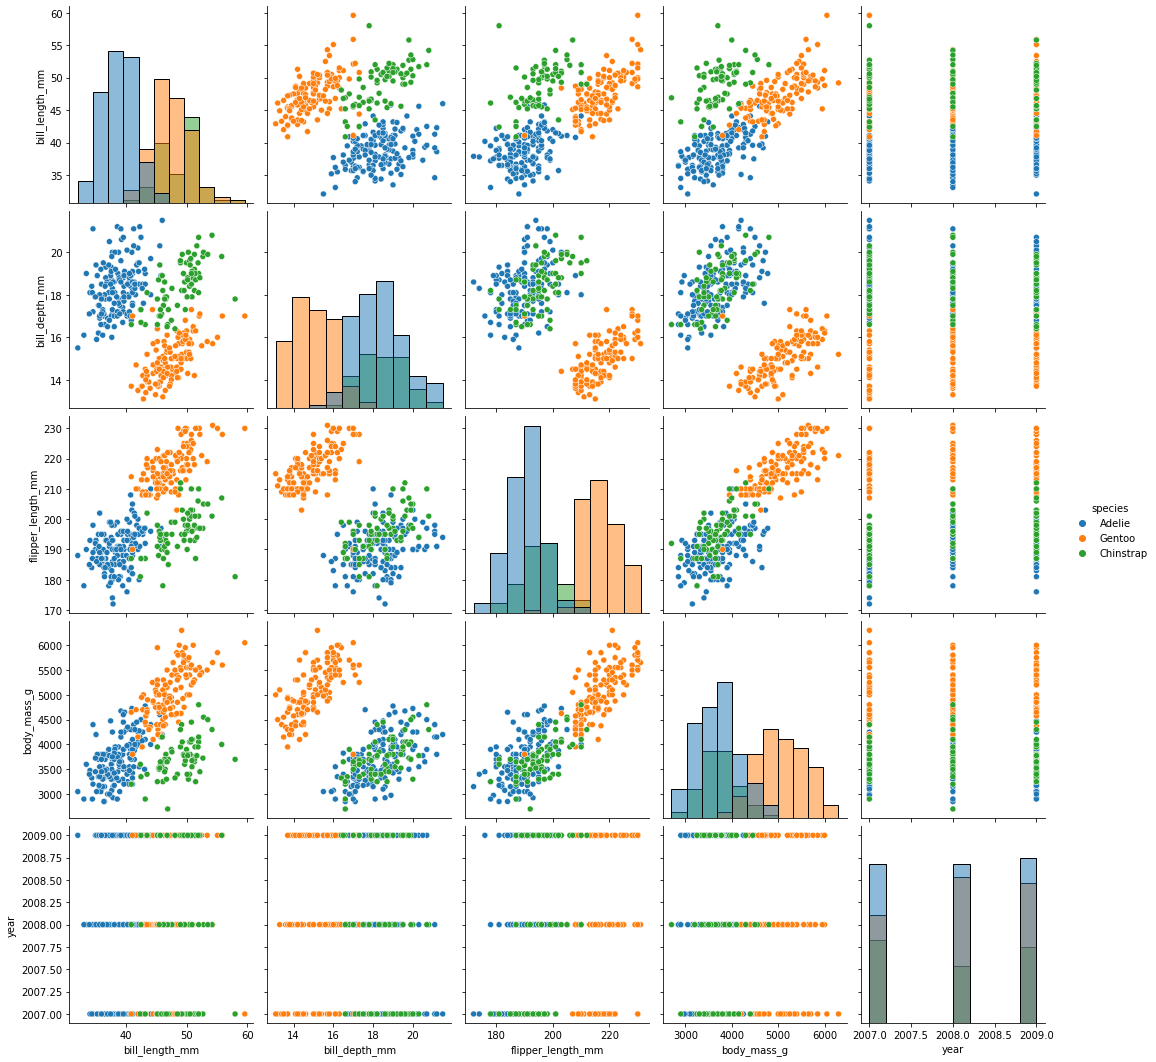

In [14]:
sns.pairplot(penguins, hue="species", size=3,diag_kind="hist")

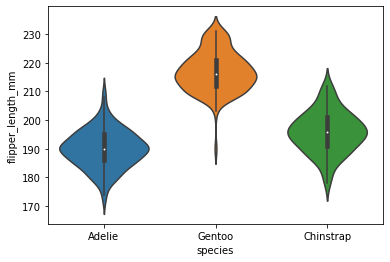

In [15]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=penguins,size=8)

In [16]:
# Divide the data into features and target
y = penguins.species
X = pd.DataFrame(penguins.drop(['species'],axis=1))


In [17]:
# Converting type of columns to category
X['sex']=X['sex'].astype('category')
X['island']=X['island'].astype('category')
X = pd.get_dummies(X)

In [18]:
# Divide the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
X_train

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
15             36.6           17.8              185.0       3700.0  2007   
6              38.9           17.8              181.0       3625.0  2007   
244            45.5           14.5              212.0       4750.0  2009   
222            47.7           15.0              216.0       4750.0  2008   
93             39.6           18.1              186.0       4450.0  2008   
..              ...            ...                ...          ...   ...   
188            42.6           13.7              213.0       4950.0  2008   
71             39.7           18.4              190.0       3900.0  2008   
106            38.6           17.2              199.0       3750.0  2009   
270            47.2           13.7              214.0       4925.0  2009   
102            37.7           16.0              183.0       3075.0  2009   

     island_Biscoe  island_Dream  island_Torgersen  sex_female  sex_male  
15               0             0                 1           1         0  
6                0             0                 1           1         0  
244              1             0                 0           1         0  
222              1             0                 0           1         0  
93               0             1                 0           0         1  
..             ...           ...               ...         ...       ...  
188              1             0                 0           1         0  
71               0             0                 1           0         1  
106              1             0                 0           1         0  
270              1             0                 0           1         0  
102              1             0                 0           1         0  

[230 rows x 10 columns]

In [20]:
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(y_train)
Y_train = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
Y_test = encoder.transform(y_test)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)


Number of numeric features: 10


In [21]:

scaler=preprocessing.StandardScaler()

X_train_scaled=scaler.fit_transform(X_train) #Scaling and fitting the training set to a model
X_test_scaled=scaler.transform(X_test) #Transformation of testing set based off of trained scaler model

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [23]:
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},{'kernel' :['poly'],'C':[1,10,100,1000]}]

In [24]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}])

In [25]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test_scaled)
y_pred_label = list(encoder.inverse_transform(y_pred))

Best score for training data: 0.9869565217391305 

Best C: 100 

Best Kernel: rbf 

Best Gamma: 0.001 



In [26]:
# Display the predictions with original values
predictions = pd.DataFrame({'true_values':list(y_test),'pred_values':y_pred_label})
pd.set_option('display.max_rows', None)
display(predictions)

true_values pred_values
0        Gentoo      Gentoo
1        Gentoo      Gentoo
2        Gentoo      Gentoo
3        Gentoo      Gentoo
4     Chinstrap   Chinstrap
5     Chinstrap   Chinstrap
6     Chinstrap   Chinstrap
7        Gentoo      Gentoo
8        Adelie      Adelie
9        Gentoo      Gentoo
10    Chinstrap   Chinstrap
11       Adelie      Adelie
12       Adelie      Adelie
13       Adelie      Adelie
14    Chinstrap   Chinstrap
15       Adelie      Adelie
16       Adelie      Adelie
17       Gentoo      Gentoo
18    Chinstrap   Chinstrap
19       Adelie      Adelie
20       Adelie      Adelie
21       Adelie      Adelie
22       Gentoo      Gentoo
23       Adelie      Adelie
24       Gentoo      Gentoo
25       Gentoo      Gentoo
26       Adelie      Adelie
27       Gentoo      Gentoo
28       Adelie      Adelie
29       Gentoo      Gentoo
30       Adelie      Adelie
31       Adelie      Adelie
32       Gentoo      Gentoo
33       Adelie      Adelie
34       Adelie      Adelie
35       Adelie      Adelie
36    Chinstrap   Chinstrap
37       Gentoo      Gentoo
38       Adelie      Adelie
39       Gentoo      Gentoo
40    Chinstrap   Chinstrap
41    Chinstrap   Chinstrap
42    Chinstrap   Chinstrap
43       Adelie      Adelie
44       Adelie      Adelie
45       Adelie      Adelie
46       Gentoo      Gentoo
47       Adelie      Adelie
48       Adelie      Adelie
49       Gentoo      Gentoo
50       Adelie      Adelie
51       Gentoo      Gentoo
52    Chinstrap   Chinstrap
53       Adelie      Adelie
54       Adelie      Adelie
55       Gentoo      Gentoo
56       Adelie      Adelie
57       Gentoo      Gentoo
58       Gentoo      Gentoo
59       Gentoo      Gentoo
60       Gentoo      Gentoo
61       Adelie      Adelie
62    Chinstrap   Chinstrap
63       Adelie      Adelie
64    Chinstrap   Chinstrap
65       Gentoo      Gentoo
66       Adelie      Adelie
67       Adelie      Adelie
68       Adelie      Adelie
69       Adelie      Adelie
70       Gentoo      Gentoo
71       Adelie      Adelie
72       Adelie      Adelie
73    Chinstrap   Chinstrap
74    Chinstrap   Chinstrap
75    Chinstrap   Chinstrap
76       Adelie      Adelie
77       Adelie      Adelie
78       Adelie      Adelie
79       Gentoo      Gentoo
80       Adelie      Adelie
81    Chinstrap   Chinstrap
82       Gentoo      Gentoo
83       Adelie      Adelie
84       Gentoo      Gentoo
85       Gentoo      Gentoo
86       Adelie      Adelie
87       Adelie      Adelie
88       Gentoo      Gentoo
89       Adelie      Adelie
90       Gentoo      Gentoo
91       Gentoo      Gentoo
92    Chinstrap   Chinstrap
93       Adelie      Adelie
94       Gentoo      Gentoo
95       Gentoo      Gentoo
96       Adelie      Adelie
97       Adelie      Adelie
98       Gentoo      Gentoo
99       Adelie      Adelie
100      Adelie      Adelie
101      Adelie      Adelie
102      Adelie      Adelie
103      Gentoo      Gentoo
104      Adelie      Adelie
105      Gentoo      Gentoo
106   Chinstrap   Chinstrap
107      Gentoo      Gentoo
108      Gentoo      Gentoo
109      Adelie      Adelie
110   Chinstrap   Chinstrap
111      Adelie      Adelie
112      Adelie      Adelie
113      Gentoo      Gentoo

In [27]:
# Making the Confusion Matrix
print('Confusion matrix: \n' ,confusion_matrix(y_test,y_pred_label))
print("\n")
print('Classification Report: \n',classification_report(y_test,y_pred_label))

print("Training set score for SVM: " ,final_model.score(X_train_scaled , y_train))
print("Testing  set score for SVM: ", final_model.score(X_test_scaled  , y_test ))

print('Cross validation score :', cross_val_score(final_model, X, y, cv=5))


Confusion matrix: 
 [[54  0  0]
 [ 0 20  0]
 [ 0  0 40]]


Classification Report: 
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        54
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        40

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Training set score for SVM:  0.0
Testing  set score for SVM:  0.0
Cross validation score : [0.76811594 0.85507246 0.88405797 0.91304348 0.91176471]
